<a href="https://colab.research.google.com/github/vchandraiitk/datascience/blob/main/15_05_2024_Vikas_M3_NB_MiniProject_2_Credit_risk_modelling_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Credit risk modelling using Logistic Regression

## Problem Statement

Predict the loan defaulters using a Logistic Regression model on the credit risk data and calculate credit scores

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration, preprocessing and visualization
* implement Logistic Regression using manual code or using sklearn library
* evaluate the model using appropriate performance metrics
* develop a credit scoring system

## Dataset

The dataset chosen for this mini-project is the [Give Me Some Credit](https://cdn.iisc.talentsprint.com/CDS/Give_me_some_credit_BigML.pdf) dataset which can be used to build models for predicting loan repayment defaulters
#### Datafields

- **SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse
- **RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- **age:** Age of borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- **DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income
- **MonthlyIncome:** Monthly income
- **NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- **NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.
- **NumberRealEstateLoansOrLines:**	Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse:**	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- **NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

## Information

Credit risk arises when a corporate or individual borrower fails to meet their debt obligations. From the lender's perspective, credit risk could disrupt its cash flows or increase collection costs, since the lender may be forced to hire a debt collection agency to enforce the collection. The loss may be partial or complete, where the lender incurs a loss of part of the loan or the entire loan extended to the borrower.

Credit scoring algorithms, which calculate the probability of default, are the best methods that banks use to determine whether or not a loan should be granted.

In order to build a credit scoring system, the following feature transformations are performed:

#### Weight of Evidence and Information value

Logistic regression is a commonly used technique in credit scoring for solving binary classification problems. Prior to model fitting, another iteration of variable selection is valuable to check if the newly WOE transformed variables are still good model candidates. Preferred candidate variables are those with higher information value having a linear relationship with the dependent variable, have good coverage across all categories, have a normal distribution, contain a notable overall contribution, and are relevant to the business.

**Weight of evidence** (WOE) is a powerful tool for feature representation and evaluation in data science. WOE can provide interpret able transformation to both categorical and numerical features. The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan. WOE can be calculated using the below formula:

$$WOE = ln \left( \frac{\%   of  Non\_Events}{\%   of  Events} \right)$$

Steps to calculate WOE
* For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
* Calculate the number of events and non-events in each group (bin)
* Calculate the % of events and % of non-events in each group.
* Calculate WOE by taking natural log of division of % of non-events and % of events

**Information value** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :
$$IV = ∑ (\% of Non\_Events - \% of Events) * WOE$$

Read more about `WOE` and `IV` from the following [link](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_NB_MiniProject_2_Credit_risk_modelling_Logistic_Regression_WoE_and_IV.pdf)

## Grading = 10 Points

### Download the dataset

In [1]:
#@title Download Dataset
#!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/GiveMeSomeCredit.csv
!pip -qq install xverse
print("Data Downloaded Successfully!")

Data Downloaded Successfully!


### Install Packages

In [2]:
!pip install xverse  > /dev/null 2>&1
!pip install pandas==1.3.5  > /dev/null 2>&1

### Import Neccesary Packages

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import math
from xverse.transformer import MonotonicBinning,WOE
%matplotlib inline

### Load the dataset

In [4]:
# YOUR CODE HERE (T-1)
df = pd.read_csv("https://cdn.iisc.talentsprint.com/CDS/MiniProjects/GiveMeSomeCredit.csv")
df.head(3)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


#### Describe the all statistical properties of the train dataset
-------- **Comments from Team-15** --------

**1. Examine Basic Information:** Check the basic structure, including data types and non-null counts.

**2. Descriptive Statistics:** Compute basic statistical measures like mean, median, standard deviation, etc.

**3. Distribution Analysis:** Plot distributions to understand the data spread.

**4. Correlation Analysis:** Check for correlations between features.

In [5]:
# YOUR CODE HERE (T-2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

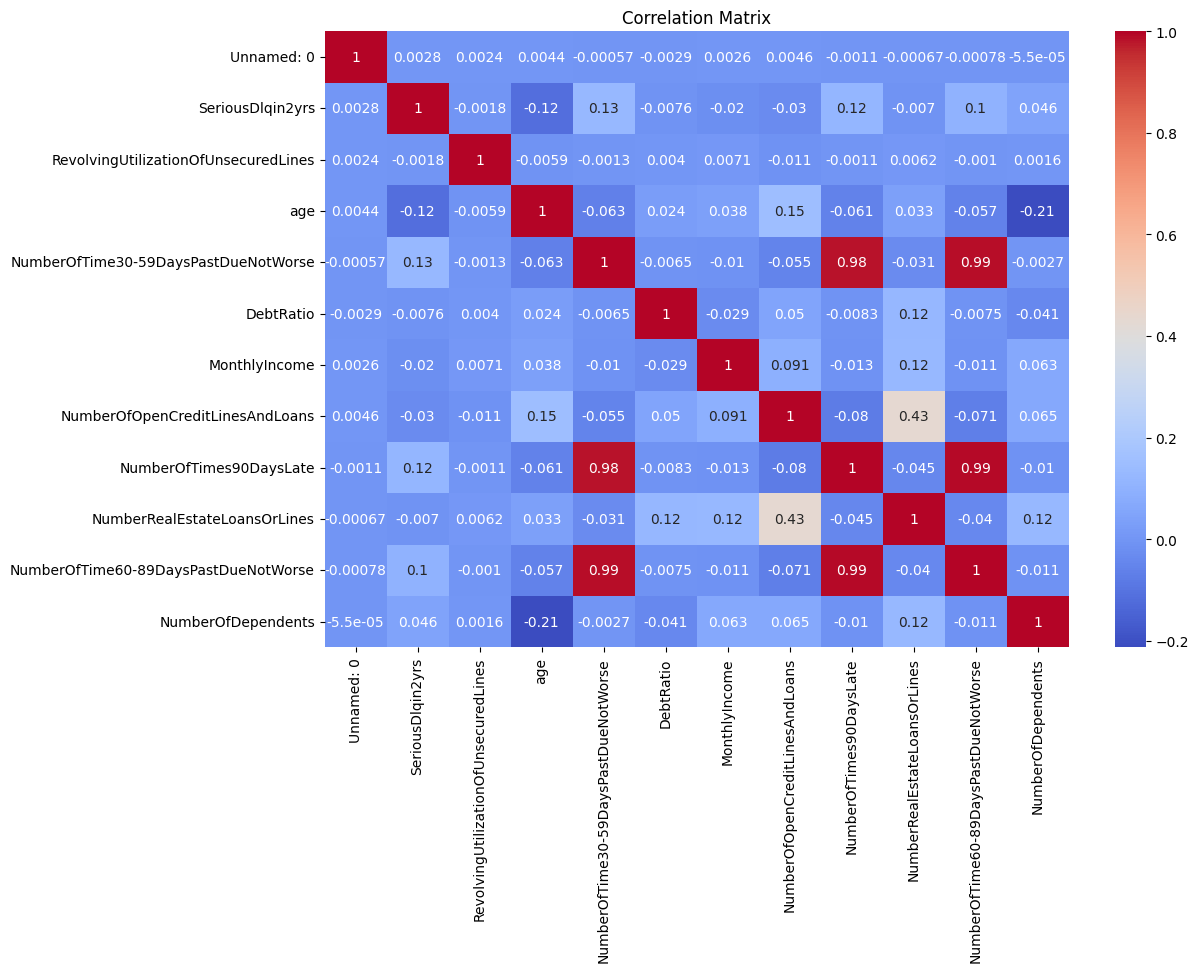

In [6]:
correlation_matrix = df.corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Pre-processing (1 point)

### Remove unwanted columns

In [7]:
# YOUR CODE HERE (T-3)
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

#### Handle the missing data

Find the how many null values in the dataset and fill with mean or remove.

In [8]:
# YOUR CODE HERE (T-4)
#df["MonthlyIncome"] = df['MonthlyIncome'].fillna(df["MonthlyIncome"].mean())
df.fillna(df.mean(), inplace=True)

### EDA &  Visualization ( 1 point)

#### Calculate the percentage of the target lebels and visualize with a graph

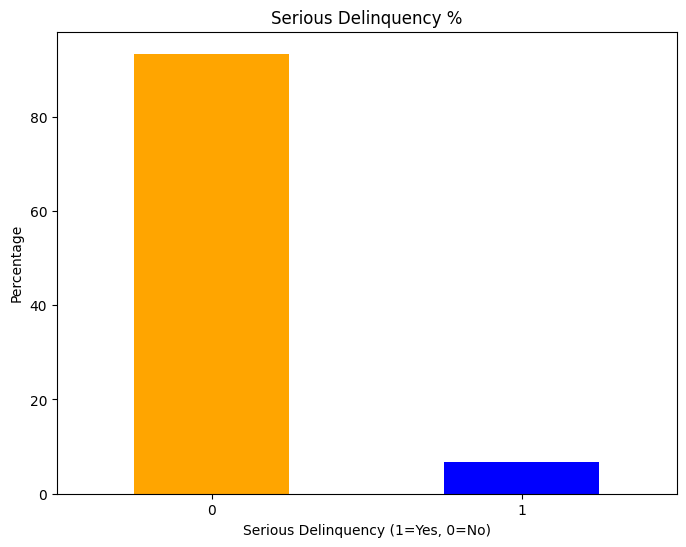

In [9]:
# YOUR CODE HERE (T-5)
target_counts = df['SeriousDlqin2yrs'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color=['orange', 'Blue'])
plt.title('Serious Delinquency %')
plt.xlabel('Serious Delinquency (1=Yes, 0=No)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

#### Plot the distribution of SeriousDlqin2yrs by age

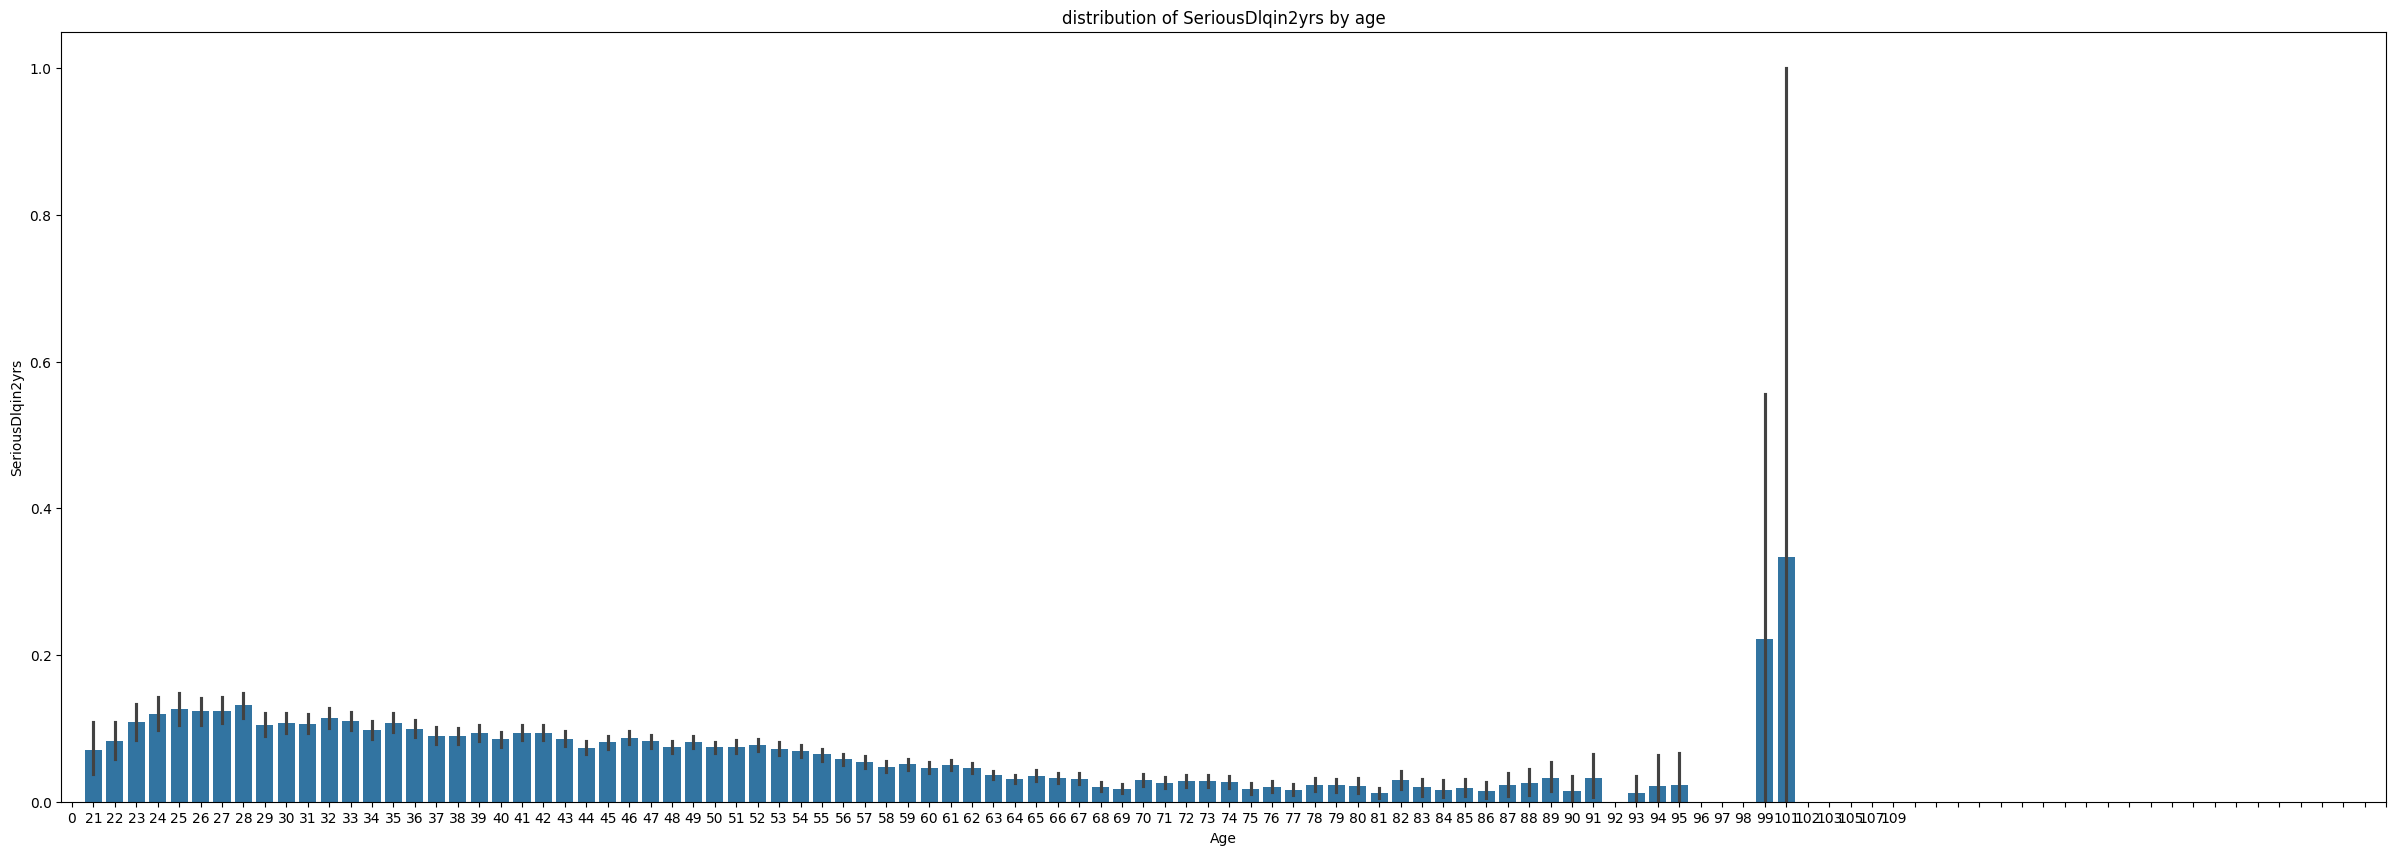

In [10]:
# YOUR CODE HERE (T-6)
plt.figure(figsize=(30, 10))
sns.barplot(data=df, x='age', y='SeriousDlqin2yrs')
plt.title('distribution of SeriousDlqin2yrs by age')
plt.xlabel('Age')
plt.ylabel('SeriousDlqin2yrs')
plt.xticks(range(df["age"].min(), df["age"].max()))
plt.show()

#### Calculate the correlation and plot the heatmap

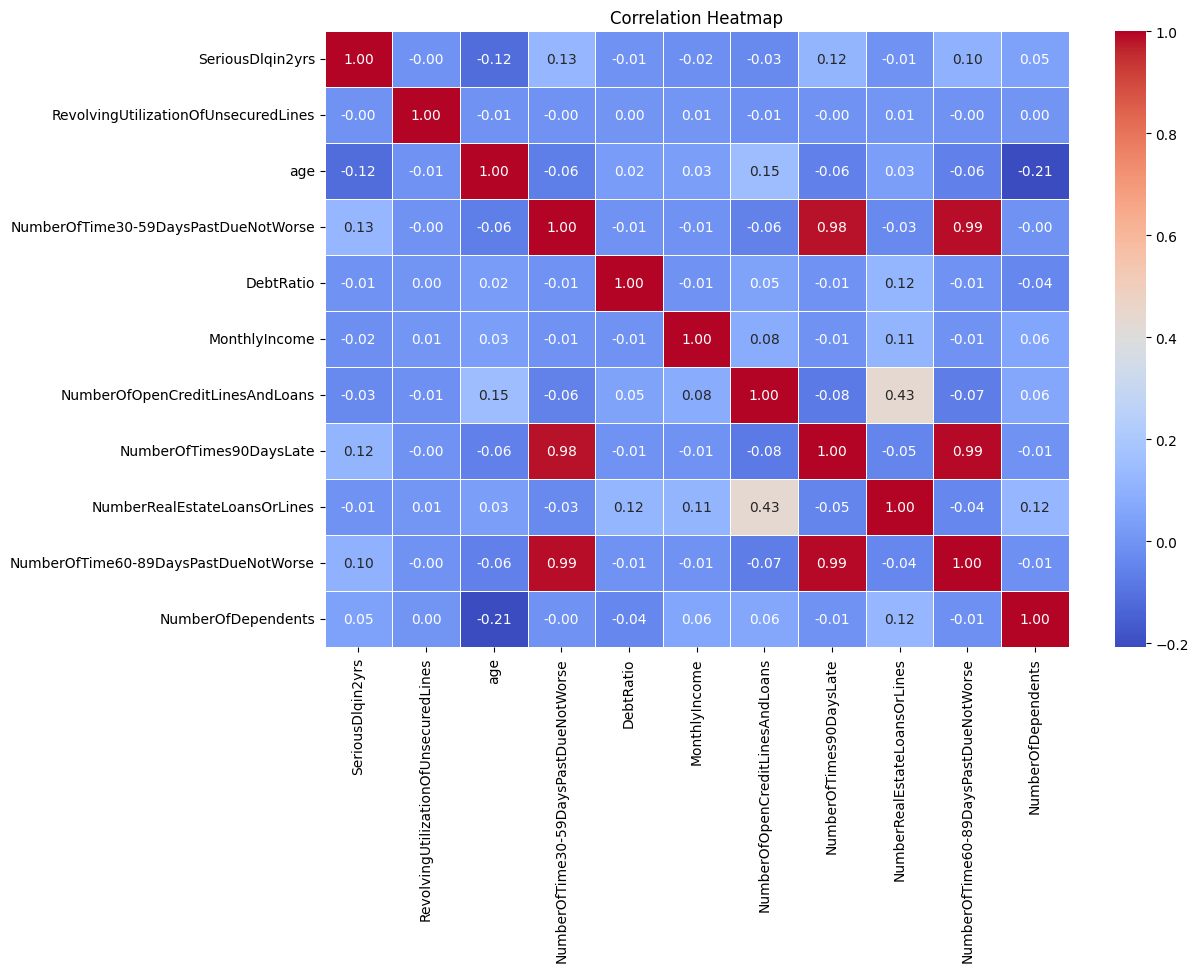

In [11]:
# YOUR CODE HERE (T-7)
correlation_matrix = df.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Data Engineering (2 points)

#### Weight of Evidence and Information value

* Arrange the binning for each variable with different bins
    * For eg. Age = 49, Age_quantile_range = (48, 56)
* Calculate information value and chooose the best features based on the rules given below

| Information Value |	Variable Predictiveness |
| --- | --- |
| Less than 0.02	|  Not useful for prediction |
| 0.02 to 0.1	| Weak predictive Power |
|  0.1 to 0.3 | Medium predictive Power |
| 0.3 to 0.5 | Strong predictive Power |
| >0.5 | Suspicious Predictive Power |

* Calculate Weight of evidence for the selected variables

Hint: Use [xverse](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_NB_MiniProject_2_Credit_risk_modelling_Logistic_Regression_Xverse.pdf). It is a machine learning Python module in the space of feature engineering, feature transformation and feature selection. It provides pre-built functions for the above steps, such as binning and conversion to WoE.

In [12]:
# YOUR CODE HERE (T-8)
from xverse.feature_subset import SplitXY

clf = SplitXY(['SeriousDlqin2yrs']) #Split the dataset into X and y
X, y = clf.fit_transform(df) #returns features (X) dataset and target(Y) as a numpy array
clf = MonotonicBinning()
clf.fit(X, y)
output_bins = clf.bins
out_X = clf.transform(X)
out_X.head()
clf = MonotonicBinning(custom_binning=output_bins) #output_bins was created earlier

out_X = clf.transform(X) #This method applies the computed bins to the input data X, resulting in a binned version of X stored in out_X.
#out_X.head()
clf = WOE()
clf.fit(X, y)
clf.woe_df.head(5)
df_iv = clf.iv_df
df_iv.head()

,Variable_Name,Information_Value
8,RevolvingUtilizationOfUnsecuredLines,0.935429
6,NumberOfTimes90DaysLate,0.484202
4,NumberOfTime30-59DaysPastDueNotWorse,0.471831
5,NumberOfTime60-89DaysPastDueNotWorse,0.264824
9,age,0.219843


In [29]:
def interpret(iv_value):
    if iv_value <= 0.02:
        return 'Does not appear to be useful for prediction'
    elif iv_value <= 0.1:
        return 'Weak predictive power'
    elif iv_value <= 0.3:
        return 'Medium predictive power'
    elif iv_value <= 0.3:
        return 'Strong predictive power'
    else:
        return 'Suspicious Predictive Power'

print("\n ------------------------------------------------------------ \n")

for index, row in df_iv.iterrows():
    feature = row['Variable_Name']
    iv_value = row['Information_Value']
    status = interpret(iv_value)
    #print(f"{feature}: {status}")
    print(f"{feature:<37}: {status}")


 ------------------------------------------------------------ 

RevolvingUtilizationOfUnsecuredLines : Suspicious Predictive Power
NumberOfTimes90DaysLate              : Suspicious Predictive Power
NumberOfTime30-59DaysPastDueNotWorse : Suspicious Predictive Power
NumberOfTime60-89DaysPastDueNotWorse : Medium predictive power
age                                  : Medium predictive power
MonthlyIncome                        : Weak predictive power
NumberOfDependents                   : Weak predictive power
NumberOfOpenCreditLinesAndLoans      : Weak predictive power
DebtRatio                            : Does not appear to be useful for prediction
NumberRealEstateLoansOrLines         : Does not appear to be useful for prediction


**Alternate solution without xverse**

**1. Arrange the binning for each variable with different bins**

In [14]:
### These are without xverse
# T-8.1

bins = {
    'RevolvingUtilizationOfUnsecuredLines': [0, 0.1, 0.2, 0.5, 1, 5],
    'age': [0, 20, 30, 40, 50, 60, 70, 100],
    'NumberOfTime30-59DaysPastDueNotWorse': [0, 1, 2, 3, 5, 10, 100],
    'DebtRatio': [0, 0.1, 0.2, 0.5, 1, 2, 5, 10, 100],
    'MonthlyIncome': [0, 1000, 3000, 5000, 10000, 20000, 50000, 1000000],
    'NumberOfOpenCreditLinesAndLoans': [0, 2, 4, 6, 8, 10, 20, 100],
    'NumberOfTimes90DaysLate': [0, 1, 2, 3, 5, 10, 100],
    'NumberRealEstateLoansOrLines': [0, 1, 2, 3, 5, 10, 20],
    'NumberOfTime60-89DaysPastDueNotWorse': [0, 1, 2, 3, 5, 10, 100],
    'NumberOfDependents': [0, 1, 2, 3, 5, 10, 20]
}

binned_data = df.copy()
binned_frame = pd.DataFrame()
for column, bin_edges in bins.items():
    col_name= f"{column}_binned"
    # Create a new column for the binned
    binned_data[col_name] = pd.cut(binned_data[column], bin_edges)
#binned_data = binned_data.iloc[:, -10:].head(5)
for i in binned_data.columns:
    if i.endswith('_binned') or i == 'SeriousDlqin2yrs':
        continue
    else:
        binned_data.drop(columns=i, inplace=True)

binned_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines_binned,age_binned,NumberOfTime30-59DaysPastDueNotWorse_binned,DebtRatio_binned,MonthlyIncome_binned,NumberOfOpenCreditLinesAndLoans_binned,NumberOfTimes90DaysLate_binned,NumberRealEstateLoansOrLines_binned,NumberOfTime60-89DaysPastDueNotWorse_binned,NumberOfDependents_binned
0,1,"(0.5, 1.0]","(40, 50]","(1.0, 2.0]","(0.5, 1.0]","(5000, 10000]","(10, 20]",NaN,"(5.0, 10.0]",NaN,"(1.0, 2.0]"
1,0,"(0.5, 1.0]","(30, 40]",NaN,"(0.1, 0.2]","(1000, 3000]","(2, 4]",NaN,NaN,NaN,"(0.0, 1.0]"
2,0,"(0.5, 1.0]","(30, 40]","(0.0, 1.0]","(0.0, 0.1]","(3000, 5000]","(0, 2]","(0.0, 1.0]",NaN,NaN,NaN
3,0,"(0.2, 0.5]","(20, 30]",NaN,"(0.0, 0.1]","(3000, 5000]","(4, 6]",NaN,NaN,NaN,NaN
4,0,"(0.5, 1.0]","(40, 50]","(0.0, 1.0]","(0.0, 0.1]","(50000, 1000000]","(6, 8]",NaN,"(0.0, 1.0]",NaN,NaN


**Calculate information value and chooose the best features based on the rules given below**

| Information Value |	Variable Predictiveness |
| --- | --- |
| Less than 0.02	|  Not useful for prediction |
| 0.02 to 0.1	| Weak predictive Power |
|  0.1 to 0.3 | Medium predictive Power |
| 0.3 to 0.5 | Strong predictive Power |
| >0.5 | Suspicious Predictive Power |

In [15]:
df_bcp = df.copy()
df_bcp.head(1)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0


In [16]:
# T-8.2
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Feature': feature,
            'Bin Values': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return dset, iv

def interpret_iv(iv_value):
    if iv_value <= 0.02:
        return 'Does not appear to be useful for prediction'
    elif iv_value <= 0.1:
        return 'Weak predictive power'
    elif iv_value <= 0.3:
        return 'Medium predictive power'
    elif iv_value <= 0.3:
        return 'Strong predictive power'
    else:
        return 'Suspicious Predictive Power'

lst = [] # List that will store WoE values for each bin
col_lst = []
iv_lst = []
IV_df = pd.DataFrame(columns=['Variable','IV']) # Dataframe that will store Information Value for each feature
for col in binned_data.columns:
    if col == 'SeriousDlqin2yrs': continue # Ignore target variable
    else:
        df1, iv = calculate_woe_iv(binned_data, col, 'SeriousDlqin2yrs')
        lst.append(df1)
        col_lst.append(col)
        iv_lst.append(iv)

IV_df['Variable']= col_lst
IV_df['IV']= iv_lst
print(IV_df)
print("\n ------------------------------------------------------------ \n")
for index, row in IV_df.iterrows():
    feature = row['Variable']
    iv_value = row['IV']
    status = interpret_iv(iv_value)
    print(f"{feature}: {status}")



                                      Variable        IV
0  RevolvingUtilizationOfUnsecuredLines_binned  0.951552
1                                   age_binned  0.242559
2  NumberOfTime30-59DaysPastDueNotWorse_binned  0.254172
3                             DebtRatio_binned  0.081927
4                         MonthlyIncome_binned  0.077466
5       NumberOfOpenCreditLinesAndLoans_binned  0.041189
6               NumberOfTimes90DaysLate_binned  0.189046
7          NumberRealEstateLoansOrLines_binned  0.039359
8  NumberOfTime60-89DaysPastDueNotWorse_binned  0.164840
9                    NumberOfDependents_binned  0.016541

 ------------------------------------------------------------ 

RevolvingUtilizationOfUnsecuredLines_binned: Suspicious Predictive Power
age_binned: Medium predictive power
NumberOfTime30-59DaysPastDueNotWorse_binned: Medium predictive power
DebtRatio_binned: Weak predictive power
MonthlyIncome_binned: Weak predictive power
NumberOfOpenCreditLinesAndLoans_binned: Weak p

**3. Calculate Weight of evidence for the selected variables**

In [17]:
# T-8.3
print(lst)

[                                       Feature  Bin Values    All   Good  \
0  RevolvingUtilizationOfUnsecuredLines_binned  (0.5, 1.0]  37967  32165   
1  RevolvingUtilizationOfUnsecuredLines_binned  (0.2, 0.5]  27003  25663   
2  RevolvingUtilizationOfUnsecuredLines_binned  (0.1, 0.2]  17305  16824   
3  RevolvingUtilizationOfUnsecuredLines_binned  (0.0, 0.1]  53526  52680   
4  RevolvingUtilizationOfUnsecuredLines_binned         NaN      0      0   

    Bad  Distr_Good  Distr_Bad       WoE        IV  
0  5802    0.252607   0.685087 -0.997709  0.431489  
1  1340    0.201544   0.158224  0.241995  0.010483  
2   481    0.132127   0.056795  0.844309  0.063603  
3   846    0.413722   0.099894  1.421086  0.445977  
4     0    0.000000   0.000000       NaN       NaN  ,       Feature     Bin Values    All   Good   Bad  Distr_Good  Distr_Bad  \
2  age_binned   (20.0, 30.0]  10757   9513  1244    0.067969   0.124090   
1  age_binned   (30.0, 40.0]  24339  21949  2390    0.156822   0.238404  

### Identify features,  target and split it into train and test

In [18]:
# YOUR CODE HERE (T-9)
target = 'SeriousDlqin2yrs'
features_columns = df.columns[df.columns != target]
X = df[features_columns]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104, test_size=0.2,  shuffle=True)

### Logistic Regression from scratch using gradient method (2 points)

For Linear Regression, we had the hypothesis $yhat = w.X +b$ , whose output range was the set of all Real Numbers.
Now, for Logistic Regression our hypothesis is  $yhat = sigmoid(w.X + b)$ , whose output range is between 0 and 1 because by applying a sigmoid function, we always output a number between 0 and 1.

$yhat = \frac{1}{1 +e^{-(w.x+b)}}$

Hint: [logistic-regression-with-python](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/odsc%20%20Logistic.pdf)

Start training


<ipython-input-19-c14db38b0b10>:7: RuntimeWarning: overflow encountered in exp
  return np.maximum(np.minimum(1 / (1 + np.exp(-x)), 0.9999), 0.0001)


Accuracy on the training set: 0.93275
Accuracy on the test set: 0.9347


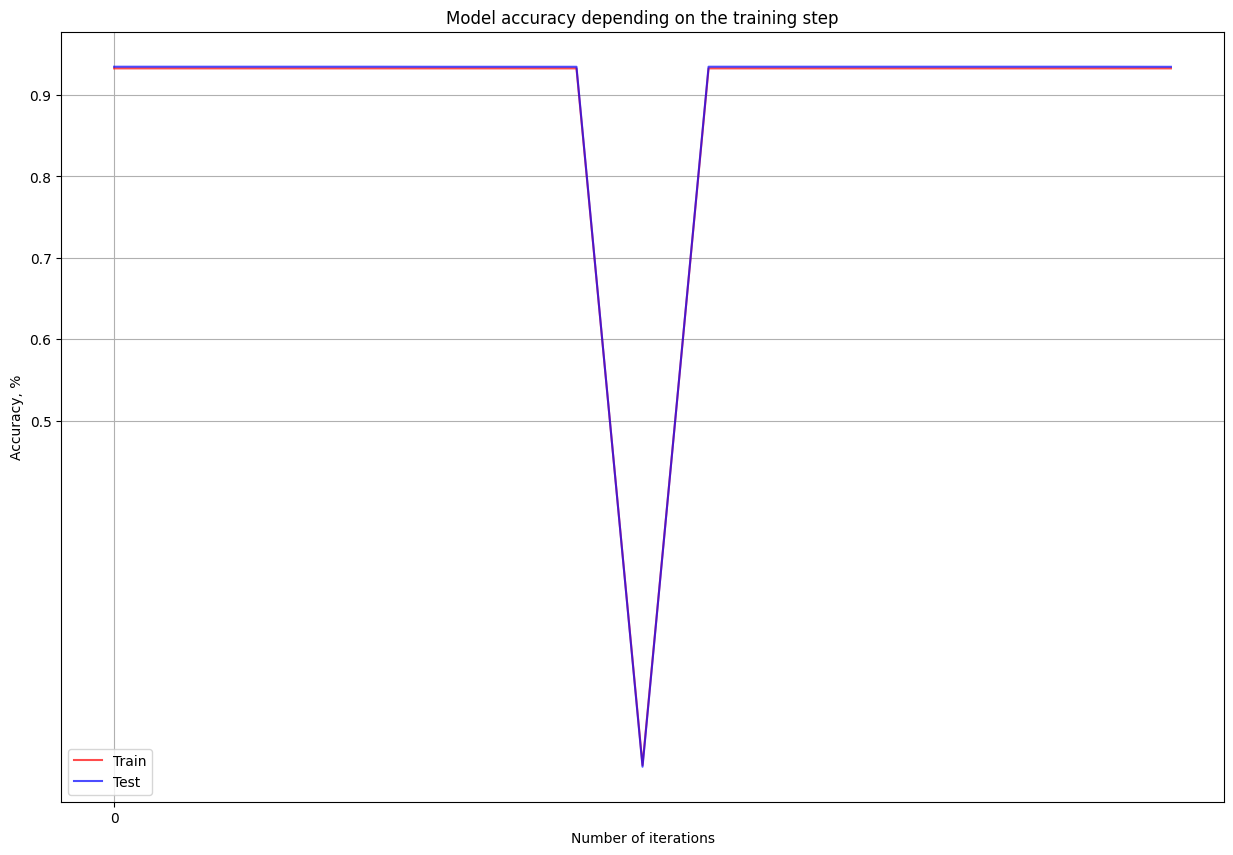

In [19]:
# YOUR CODE HERE (T-10)
X = df.drop(columns='SeriousDlqin2yrs').values
y = df['SeriousDlqin2yrs'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def sigmoid(x):
    return np.maximum(np.minimum(1 / (1 + np.exp(-x)), 0.9999), 0.0001)

def cost_function(x, y, theta):
    t = x.dot(theta)
    return - np.sum(y * np.log(sigmoid(t)) + (1 - y) * np.log(1 - sigmoid(t))) / x.shape[0]

def gradient_cost_function(x, y, theta):
    t = x.dot(theta)
    return x.T.dot(y - sigmoid(t)) / x.shape[0]

def update_theta(x, y, theta, learning_rate):
    return theta + learning_rate * gradient_cost_function(x, y, theta)

def train(x, y, learning_rate, iterations=500, threshold=0.0005):
   theta = np.zeros(x.shape[1])
   costs = []
   print('Start training')
   for i in range(iterations):
       theta = update_theta(x, y, theta, learning_rate)
       cost = cost_function(x, y, theta)
    # Dont know what is happenign here.
       #print(f'[Training step #{i}] – Cost function: {cost:.4f}')
       costs.append({'cost': cost, 'weights': theta})
       if i > 15 and abs(costs[-2]['cost'] - costs[-1]['cost']) < threshold:
           break
   return theta, costs

def predict(x, theta):
    return (sigmoid(x.dot(theta)) >= 0.5).astype(int)

def get_accuracy(x, y, theta):
    y_pred = predict(x, theta)
    return (y_pred == y).sum() / y.shape[0]

theta, costs = train(X_train, y_train, learning_rate=0.0001)
print(f'Accuracy on the training set: {get_accuracy(X_train, y_train, theta)}')
print(f'Accuracy on the test set: {get_accuracy(X_test, y_test, theta)}')

plt.figure(figsize=(15,10))
plt.title('Model accuracy depending on the training step')
plt.plot(np.arange(0, len(costs)),
    [get_accuracy(X_train, y_train, c['weights']) for c in costs],
         alpha=0.7, label='Train', color='r')
plt.plot(np.arange(0, len(costs)),
    [get_accuracy(X_test, y_test, c['weights']) for c in costs],
         alpha=0.7, label='Test', color='b')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy, %')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(np.arange(0, len(costs)+1, 40))
plt.yticks(np.arange(0.5, 1, 0.1))
plt.show()

### Implement the Logistic regression using sklearn (2 points)

As there is imbalance in the class distribution, add weightage to the Logistic regression.

* Find the accuracy with class weightage in Logistic regression
* Find the accuracy without class weightage in Logistic regression

Hint: [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [20]:
# With weightage
# YOUR CODE HERE (T-11)
from sklearn.metrics import accuracy_score
# Train logistic regression model with class weights
model_with_weights = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model_with_weights.fit(X_train, y_train)

# Predict and calculate accuracy with class weights
y_pred_test_with_weights = model_with_weights.predict(X_test)
accuracy_with_weights = accuracy_score(y_test, y_pred_test_with_weights)
print(f"Accuracy with class weights: {accuracy_with_weights}")

Accuracy with class weights: 0.8398666666666667


In [21]:
# Without weightage
# YOUR CODE HERE (T-12)
# Train logistic regression model without class weights
model_without_weights = LogisticRegression(max_iter=1000, random_state=42)
model_without_weights.fit(X_train, y_train)

# Predict and calculate accuracy without class weights
y_pred_test_without_weights = model_without_weights.predict(X_test)
accuracy_without_weights = accuracy_score(y_test, y_pred_test_without_weights)

print(f"Accuracy without class weights: {accuracy_without_weights}")

Accuracy without class weights: 0.9346666666666666


### Credit scoring (1 point)

When scaling the model into a scorecard, we will need both the Logistic Regression coefficients from model fitting as well as the transformed WoE values. We will also need to convert the score from the model from the log-odds unit to a points system.
For each independent variable Xi, its corresponding score is:

$Score = \sum_{i=1}^{n} (-(β_i × WoE_i + \frac{α}{n}) × Factor + \frac{Offset}{n})$

Where:

βi — logistic regression coefficient for the variable Xi

α — logistic regression intercept

WoE — Weight of Evidence value for variable Xi

n — number of independent variable Xi in the model

Factor, Offset — known as scaling parameter

  - Factor = pdo / ln(2); pdo is points to double the odds
  - Offset = Round_of_Score - {Factor * ln(Odds)}

In [22]:
# Scaling factors
factor = 20/np.log(2)
offset = 600 - ( factor * np.log(50))
factor, offset

(28.85390081777927, 487.1228762045055)

In [23]:
# YOUR CODE HERE (T-13)
model = LogisticRegression()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Performance Metrics (1 point)

#### Precision

In [24]:
# YOUR CODE HERE (T-14)
precision = precision_score(y_test, y_pred)
precision

0.5176470588235295

#### Recall

In [25]:
# YOUR CODE HERE (T-15)
recall = recall_score(y_test, y_pred)
recall

0.022494887525562373

#### Classification Report

In [26]:
# YOUR CODE HERE (T-16)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9349

#### Confusion matrix

In [27]:
# YOUR CODE HERE (T-17)
conf_matrix = confusion_matrix(y_test, y_pred)

### Report Analysis

* Comment on the performance of the model with weightage and without weightage
* Have you tried implementing Logistic regression with normal features instead of WOE ?
  - Compare the classification report for both implementations